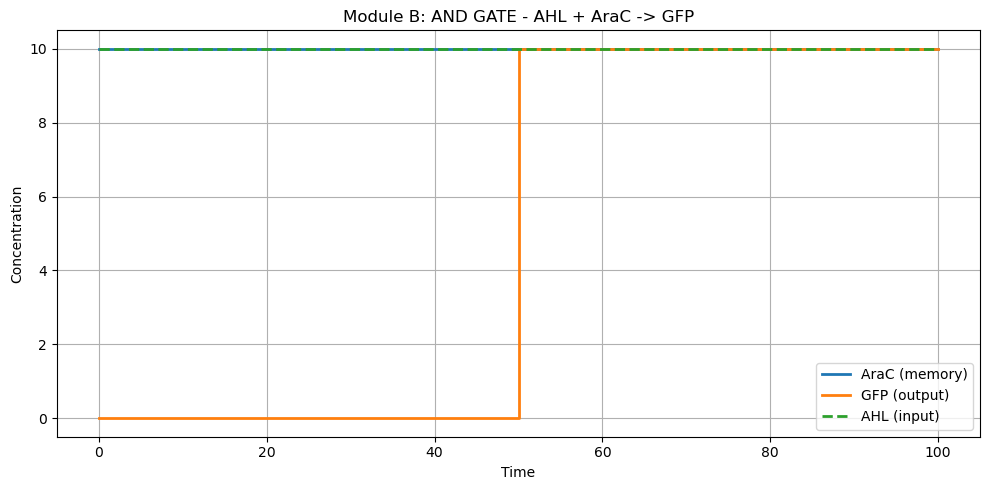

In [11]:
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np

model = te.loada("""
model AND_Gate
// Species
species AHL, AraC, GFP
                 
// Parameters
k_GFP = 10
k_deg_GFP = 0.1
K = 1
n = 2
                 
// GFP only made if both AHL and AraC are present
J1: -> GFP; k_deg_GFP*(AHL^n/(K^n+AHL^n))*(AraC^n/(K^n+AraC^n))
J2: GFP -> ; k_deg_GFP*GFP
                 
AHL = 0;
AraC = 0;
GFP = 0;                 
end
""")

model.Arac = 0
model.AHL = 10
r4 = model.simulate(0, 50, 500)

model.AraC = 10
r5 = model.simulate(50, 100, 500)

r_combined2 = np.vstack((r4, r5))
time = r_combined2[:,0]
arac_memory = r_combined2[:,1]
gfp_output = r_combined2[:,2]
ahl_input = [10]*len(r_combined2)

plt.figure(figsize=(10,5))
plt.plot(time, arac_memory, label='AraC (memory)', linewidth=2)
plt.plot(time, gfp_output, label='GFP (output)', linewidth=2)
plt.plot(time, ahl_input, '--', label='AHL (input)', linewidth=2)

plt.title("Module B: AND GATE - AHL + AraC -> GFP")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()